In [2]:
%pip install "matplotlib>=3.5.3" "numpy>=1.21.6" "pandas>=1.1.5" "scikit-learn>=1.0.2" "seaborn>=0.12.2" "ucimlrepo>=0.0.7"

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# Scikit-learn imports
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             confusion_matrix, classification_report, roc_curve, 
                             roc_auc_score, auc)

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Set random seed for reproducibility
np.random.seed(5)

print("Libraries imported successfully!")

Libraries imported successfully!


In [4]:
# Load the dataset from UCI repository
breast_cancer_data = fetch_ucirepo(id=17)

# Extract features and targets
X = breast_cancer_data.data.features
y = breast_cancer_data.data.targets

# Display dataset information
print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"\nDataset Shape: {X.shape}")
print(f"Number of Samples: {X.shape[0]}")
print(f"Number of Features: {X.shape[1]}")
print(f"\nTarget Variable Shape: {y.shape}")
print(f"Target Classes: {y['Diagnosis'].unique()}")
print(f"\nClass Distribution:")
print(y['Diagnosis'].value_counts())
print(f"\nClass Distribution (%):")
print(y['Diagnosis'].value_counts(normalize=True) * 100)

DATASET OVERVIEW

Dataset Shape: (569, 30)
Number of Samples: 569
Number of Features: 30

Target Variable Shape: (569, 1)
Target Classes: ['M' 'B']

Class Distribution:
Diagnosis
B    357
M    212
Name: count, dtype: int64

Class Distribution (%):
Diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64


In [5]:
# Display feature names and first few rows
print("\n" + "="*60)
print("FEATURE NAMES")
print("="*60)
print("\nAll 30 features:")
for i, col in enumerate(X.columns, 1):
    print(f"{i:2d}. {col}")

print("\n" + "="*60)
print("FIRST 5 SAMPLES")
print("="*60)
display(X.head())

print("\n" + "="*60)
print("DESCRIPTIVE STATISTICS")
print("="*60)
display(X.describe())


FEATURE NAMES

All 30 features:
 1. radius1
 2. texture1
 3. perimeter1
 4. area1
 5. smoothness1
 6. compactness1
 7. concavity1
 8. concave_points1
 9. symmetry1
10. fractal_dimension1
11. radius2
12. texture2
13. perimeter2
14. area2
15. smoothness2
16. compactness2
17. concavity2
18. concave_points2
19. symmetry2
20. fractal_dimension2
21. radius3
22. texture3
23. perimeter3
24. area3
25. smoothness3
26. compactness3
27. concavity3
28. concave_points3
29. symmetry3
30. fractal_dimension3

FIRST 5 SAMPLES


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



DESCRIPTIVE STATISTICS


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


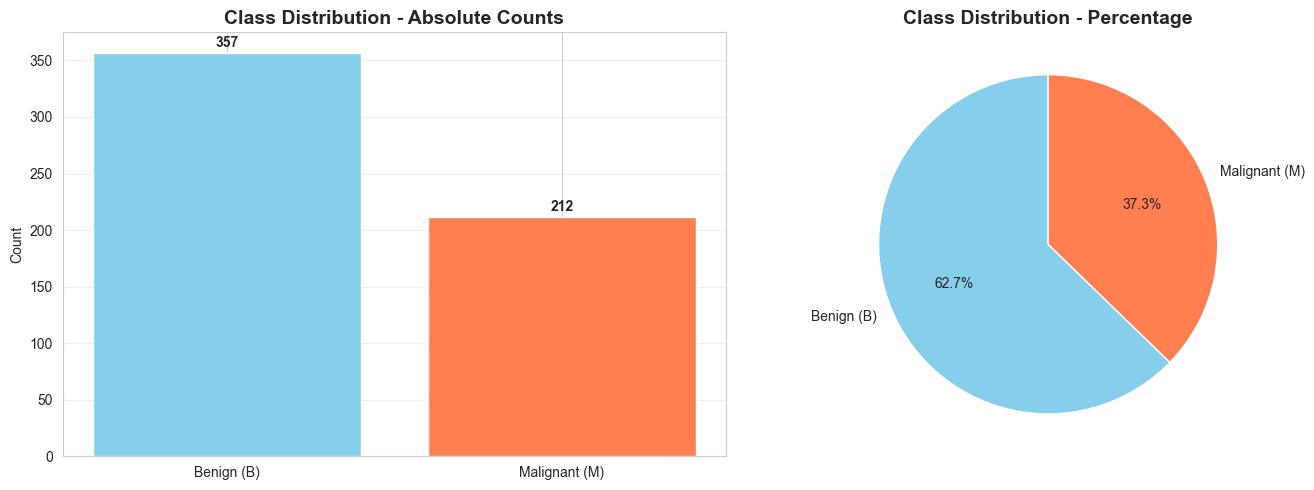

In [6]:
# Convert diagnosis to binary (M=1, B=0) for easier analysis
y_binary = (y['Diagnosis'] == 'M').astype(int)

# Visualization 1: Class Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
counts = y['Diagnosis'].value_counts()
axes[0].bar(['Benign (B)', 'Malignant (M)'], counts.values, color=['skyblue', 'coral'])
axes[0].set_ylabel('Count')
axes[0].set_title('Class Distribution - Absolute Counts', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(counts.values):
    axes[0].text(i, v + 5, str(v), ha='center', fontweight='bold')

# Pie chart
axes[1].pie(counts.values, labels=['Benign (B)', 'Malignant (M)'], autopct='%1.1f%%',
            colors=['skyblue', 'coral'], startangle=90)
axes[1].set_title('Class Distribution - Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


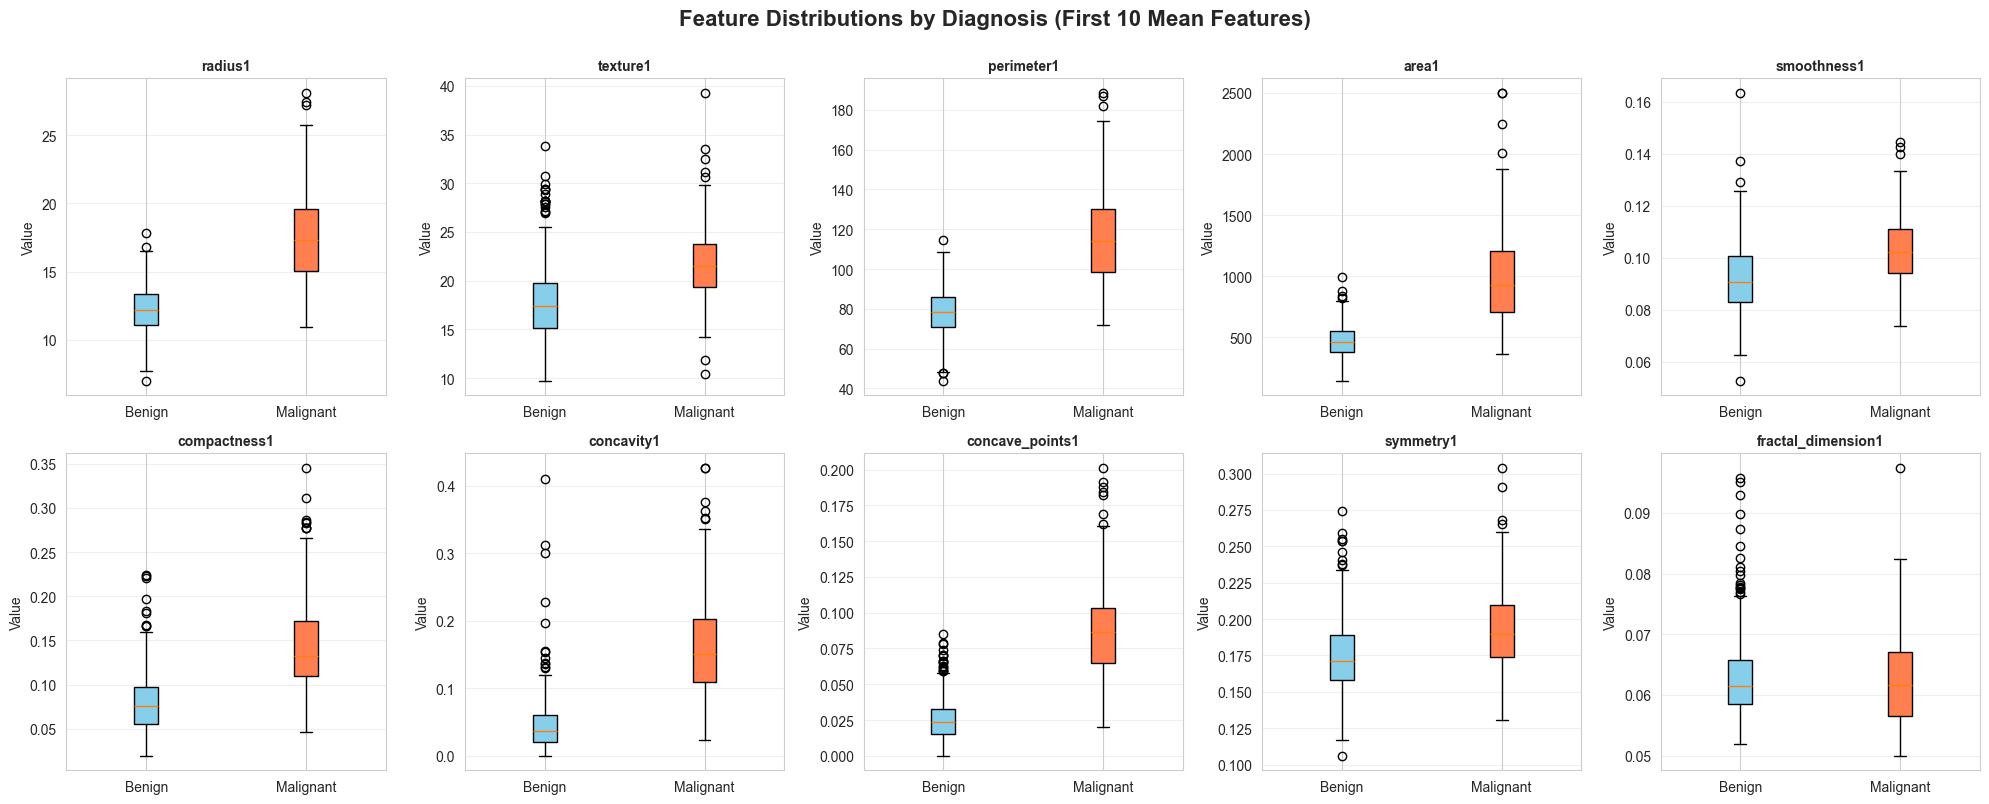

In [7]:
# Visualization 2: Feature Distributions (Box Plots)
# We'll visualize the first 10 features (mean values) by diagnosis

features_to_plot = X.columns[:10]  # First 10 mean features

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

for idx, feature in enumerate(features_to_plot):
    # Create data for box plot
    benign_data = X.loc[y['Diagnosis'] == 'B', feature]
    malignant_data = X.loc[y['Diagnosis'] == 'M', feature]
    
    # Box plot
    bp = axes[idx].boxplot([benign_data, malignant_data], 
                            tick_labels=['Benign', 'Malignant'],
                            patch_artist=True)
    
    # Color the boxes
    bp['boxes'][0].set_facecolor('skyblue')
    bp['boxes'][1].set_facecolor('coral')
    
    axes[idx].set_title(feature, fontsize=10, fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(axis='y', alpha=0.3)

plt.suptitle('Feature Distributions by Diagnosis (First 10 Mean Features)', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()